In [24]:
! pip3 install numpy
! pip3 install matplotlib
! pip3 install sklearn
! pip3 install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from datetime import datetime as dt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [25]:
np.random.seed(1)

def EuclideanDistanceCal(xi, xj):
    return np.sqrt(np.sum((xi - xj)**2))

def squaredDeviation(xi, mean):
    return np.sum((xi - mean)**2)

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        # List of samples for each cluster
        
        # Contain index of each data point.
        self.clusters = [[] for _ in range(self.K)] 
        # Contain coordiante of centroid points
        self.centroids = [] 
        
        # inertia
        self.inertia_ = 0
        
    def _initCenters(self):
        clusters = [[] for _ in range(self.K)]
        X = self.X
        variance = np.var(X, axis = 0)
        inc_sorted_index = sorted(range(len(variance)), 
                                  key=lambda k: variance[k])
        
        max_column = inc_sorted_index[-1]
        X = X[np.argsort(X[:, max_column])]
        runIndex = 0
        div = len(X)// self.K
        mod = len(X) % self.K
        while (runIndex < len(X)):
            if (runIndex + div + mod >= len(X) - 1):
                self.centroids.append(np.median(
                                        X[runIndex:runIndex+div+mod, ], axis=0
                                        ).tolist())                
                break
            self.centroids.append(np.median(
                                    X[runIndex:runIndex+div, ], axis=0
                                        ).tolist())
            runIndex = runIndex + div
    def _initCenterRandom(self):
        random_sample_idxs = np.random.choice(self.n_samples, 
                                              self.K, 
                                              replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]        
        

    def _closestCentroid(self, sample, centroids):
        #  Calculate distance of the current sample to each centroid
        distances = []
        for centroid in centroids:
            distance = EuclideanDistanceCal(sample, centroid)
            distances.append(distance)
        #  Find the labels that make minimum distance
        return np.argmin(distances)

    def _createClusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idxSample, sample in enumerate(self.X):
            idxCentroid = self._closestCentroid(sample, centroids)
            clusters[idxCentroid].append(idxSample)
        return clusters
        
    def _getClusterLabels(self, clusters):
        # Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)        
        for idxCluster, cluster in enumerate(clusters):
            for idxSample in cluster:
                labels[idxSample] = idxCluster
        return labels
    
    def _getCentroids(self, clusters):
        # Assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for idxCluster, cluster in enumerate(clusters):
            meanClusterValue = np.mean(self.X[cluster], axis=0)
            centroids[idxCluster] = meanClusterValue
        return centroids
    
    def _calcInertia(self):
        wcss = []
        for idxCluster, cluster  in enumerate(self.clusters):
            centroid = self.centroids[idxCluster]
            subsetData  = self.clusters[idxCluster]
            for idxData in subsetData:
                point = self.X[idxData]
                wcss.append(squaredDeviation(point, centroid))
        return sum(wcss)    
    
    def _isConverged(self, prevCentroids, currCentroids):
        # Distances between each old and new centroids, fol all centroids
        distances = []
        for idx in range(self.K):
            distance = EuclideanDistanceCal(prevCentroids[idx], 
                                            currCentroids[idx])
            distances.append(distance)
        return sum(distances) == 0
    
    def visualize(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.show()
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # STEP 1: Initialize
        self._initCenterRandom()
        
        # STEP 2: Clustering 
        for index in range(self.max_iters):
            # Assigning samples to the closest centroids 
            self.clusters = self._createClusters(self.centroids)
            # if self.plot_steps:
            #     self.visualize()
            
            # Calculate new centroids from clusters
            prevCentroids = self.centroids
            self.centroids = self._getCentroids(self.clusters)
            
            # Update inertia_
            self.inertia_ = self._calcInertia()
            if(index == 0):
                print(self.inertia_)
            
            # If clusters have changed -> repeated, if not -> break
            if self._isConverged(prevCentroids=prevCentroids, 
                                 currCentroids=self.centroids):
                break
            # if self.plot_steps:
            #     self.visualize()
        # Classify samples as the index of their clusters
        return self._getClusterLabels(self.clusters)

In [26]:
# X, y = make_blobs(
#     centers=10, n_samples=500, n_features=2, shuffle=True, random_state=40
# )

# clusters = len(np.unique(y))
# wcss = []
# # figure, axis = plt.subplots(clusters/3 + clusters % 3, 3)
# for num in range(1, clusters + 10):
#     k = KMeans(K=num, max_iters=150, plot_steps=True)    
#     y_pred = k.predict(X)
#     wcss.append(k.inertia_)
#     k.visualize()    
# plt.plot(range(1, clusters + 10), wcss)
# plt.title('The elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

## STEP 1:  IMPORT DATA & HANDLING

In [27]:
df = pd.read_csv("./sp500_stocks.csv")
print(df)
# print(len((df[df.isnull().any(axis=1)]).index))
# df = df.dropna()
date_start = '2015-01-01'
date_end = '2022-01-01'
df = df[(df['Date'] >= date_start) & (df['Date'] <= date_end)]
df = df.reset_index()
df.drop('index', inplace=True, axis=1)
print(df)
print(df[df['Symbol'] == 'APPL'])

               Date Symbol   Adj Close       Close        High         Low  \
0        2009-12-31    MMM         NaN         NaN         NaN         NaN   
1        2010-01-04    MMM   59.318886   83.019997   83.449997   82.669998   
2        2010-01-05    MMM   58.947342   82.500000   83.230003   81.699997   
3        2010-01-06    MMM   59.783295   83.669998   84.599998   83.510002   
4        2010-01-07    MMM   59.826176   83.730003   83.760002   82.120003   
...             ...    ...         ...         ...         ...         ...   
1575499  2022-05-18    ZTS  158.860001  158.860001  165.199997  158.100006   
1575500  2022-05-19    ZTS  158.630005  158.630005  160.350006  156.669998   
1575501  2022-05-20    ZTS  162.559998  162.559998  162.809998  159.009995   
1575502  2022-05-23    ZTS  163.000000  163.000000  164.850006  162.350006   
1575503  2022-05-24    ZTS  163.050003  163.050003  163.869995  161.320007   

               Open     Volume  
0               NaN        NaN

In [28]:
symbols = (df.drop_duplicates(subset=['Symbol']))['Symbol']
symbols = symbols.reset_index()
symbols.drop('index', inplace=True, axis=1)
print(symbols)

    Symbol
0      MMM
1      AOS
2      ABT
3     ABBV
4     ABMD
..     ...
499    YUM
500   ZBRA
501    ZBH
502   ZION
503    ZTS

[504 rows x 1 columns]


In [29]:
df_copy = df.copy()

for idx in range(len(symbols)):
    symbol = symbols['Symbol'].iloc[idx]
    filter_df = df[df['Symbol'] == symbol]
    number_rows_NaN_value = len(filter_df[filter_df.isna().any(axis=1)])
    if (number_rows_NaN_value/len(symbols) >= 0.2):
        df_copy.drop(df_copy[df_copy['Symbol'] == symbol].index, inplace=True)

df_copy = df_copy.reset_index()
df_copy.drop('index', inplace=True, axis=1)
print(df_copy)

              Date Symbol   Adj Close       Close        High         Low  \
0       2015-01-02    MMM  132.667297  164.059998  165.080002  162.729996   
1       2015-01-05    MMM  129.675308  160.360001  163.639999  160.080002   
2       2015-01-06    MMM  128.292511  158.649994  161.369995  157.740005   
3       2015-01-07    MMM  129.222473  159.800003  160.279999  158.940002   
4       2015-01-08    MMM  132.319626  163.630005  163.690002  160.520004   
...            ...    ...         ...         ...         ...         ...   
856990  2021-12-27    ZTS  246.114746  246.509995  246.720001  243.080002   
856991  2021-12-28    ZTS  243.858383  244.250000  247.839996  243.639999   
856992  2021-12-29    ZTS  246.633926  247.029999  247.850006  243.639999   
856993  2021-12-30    ZTS  244.766922  245.160004  249.270004  244.960007   
856994  2021-12-31    ZTS  243.638733  244.029999  246.990005  243.740005   

              Open     Volume  
0       164.710007  2116400.0  
1       163

In [30]:
filtered_symbols = (df_copy.drop_duplicates(subset=['Symbol']))['Symbol']
filtered_symbols = filtered_symbols.reset_index()
filtered_symbols.drop('index', inplace=True, axis=1)
print(filtered_symbols)

    Symbol
0      MMM
1      AOS
2      ABT
3     ABBV
4     ABMD
..     ...
480    YUM
481   ZBRA
482    ZBH
483   ZION
484    ZTS

[485 rows x 1 columns]


In [31]:
lenOfTimeSeries = len(df_copy[df_copy['Symbol'] == 'MMM'])
movements = np.zeros(shape=(len(filtered_symbols), lenOfTimeSeries))

for idx in range(len(filtered_symbols)):
    symbol = filtered_symbols['Symbol'].iloc[idx]
    filter_df = df_copy[df_copy['Symbol'] == symbol]    
    stock_close = (filter_df.fillna(method='ffill').
                   fillna(method='bfill'))['Close']
    stock_open = (filter_df.fillna(method='ffill').
                  fillna(method='bfill'))['Open']
    movement = (stock_close - stock_open).to_numpy()
    movements[idx, :] = movement
print("Shape:" , movements.shape)
print("movements = ", movements)

Shape: (485, 1767)
movements =  [[-0.65000916 -2.63999939 -2.17001343 ...  0.93000793 -1.22999573
   0.1000061 ]
 [-0.30500031 -0.08500099 -0.26999855 ...  0.66999817 -0.61000061
   0.72000122]
 [-0.34999847  0.11000061 -0.59000015 ...  0.72000122 -0.41000366
  -0.25999451]
 ...
 [-1.57281494  2.69902802 -1.32038879 ...  0.14562988 -0.09708405
  -0.89320374]
 [-0.37999916 -1.         -1.01000023 ...  0.17000198 -0.31999969
   0.29000092]
 [-0.14999771 -0.20000076 -0.52000046 ...  3.00999451 -1.88999939
  -1.13000488]]


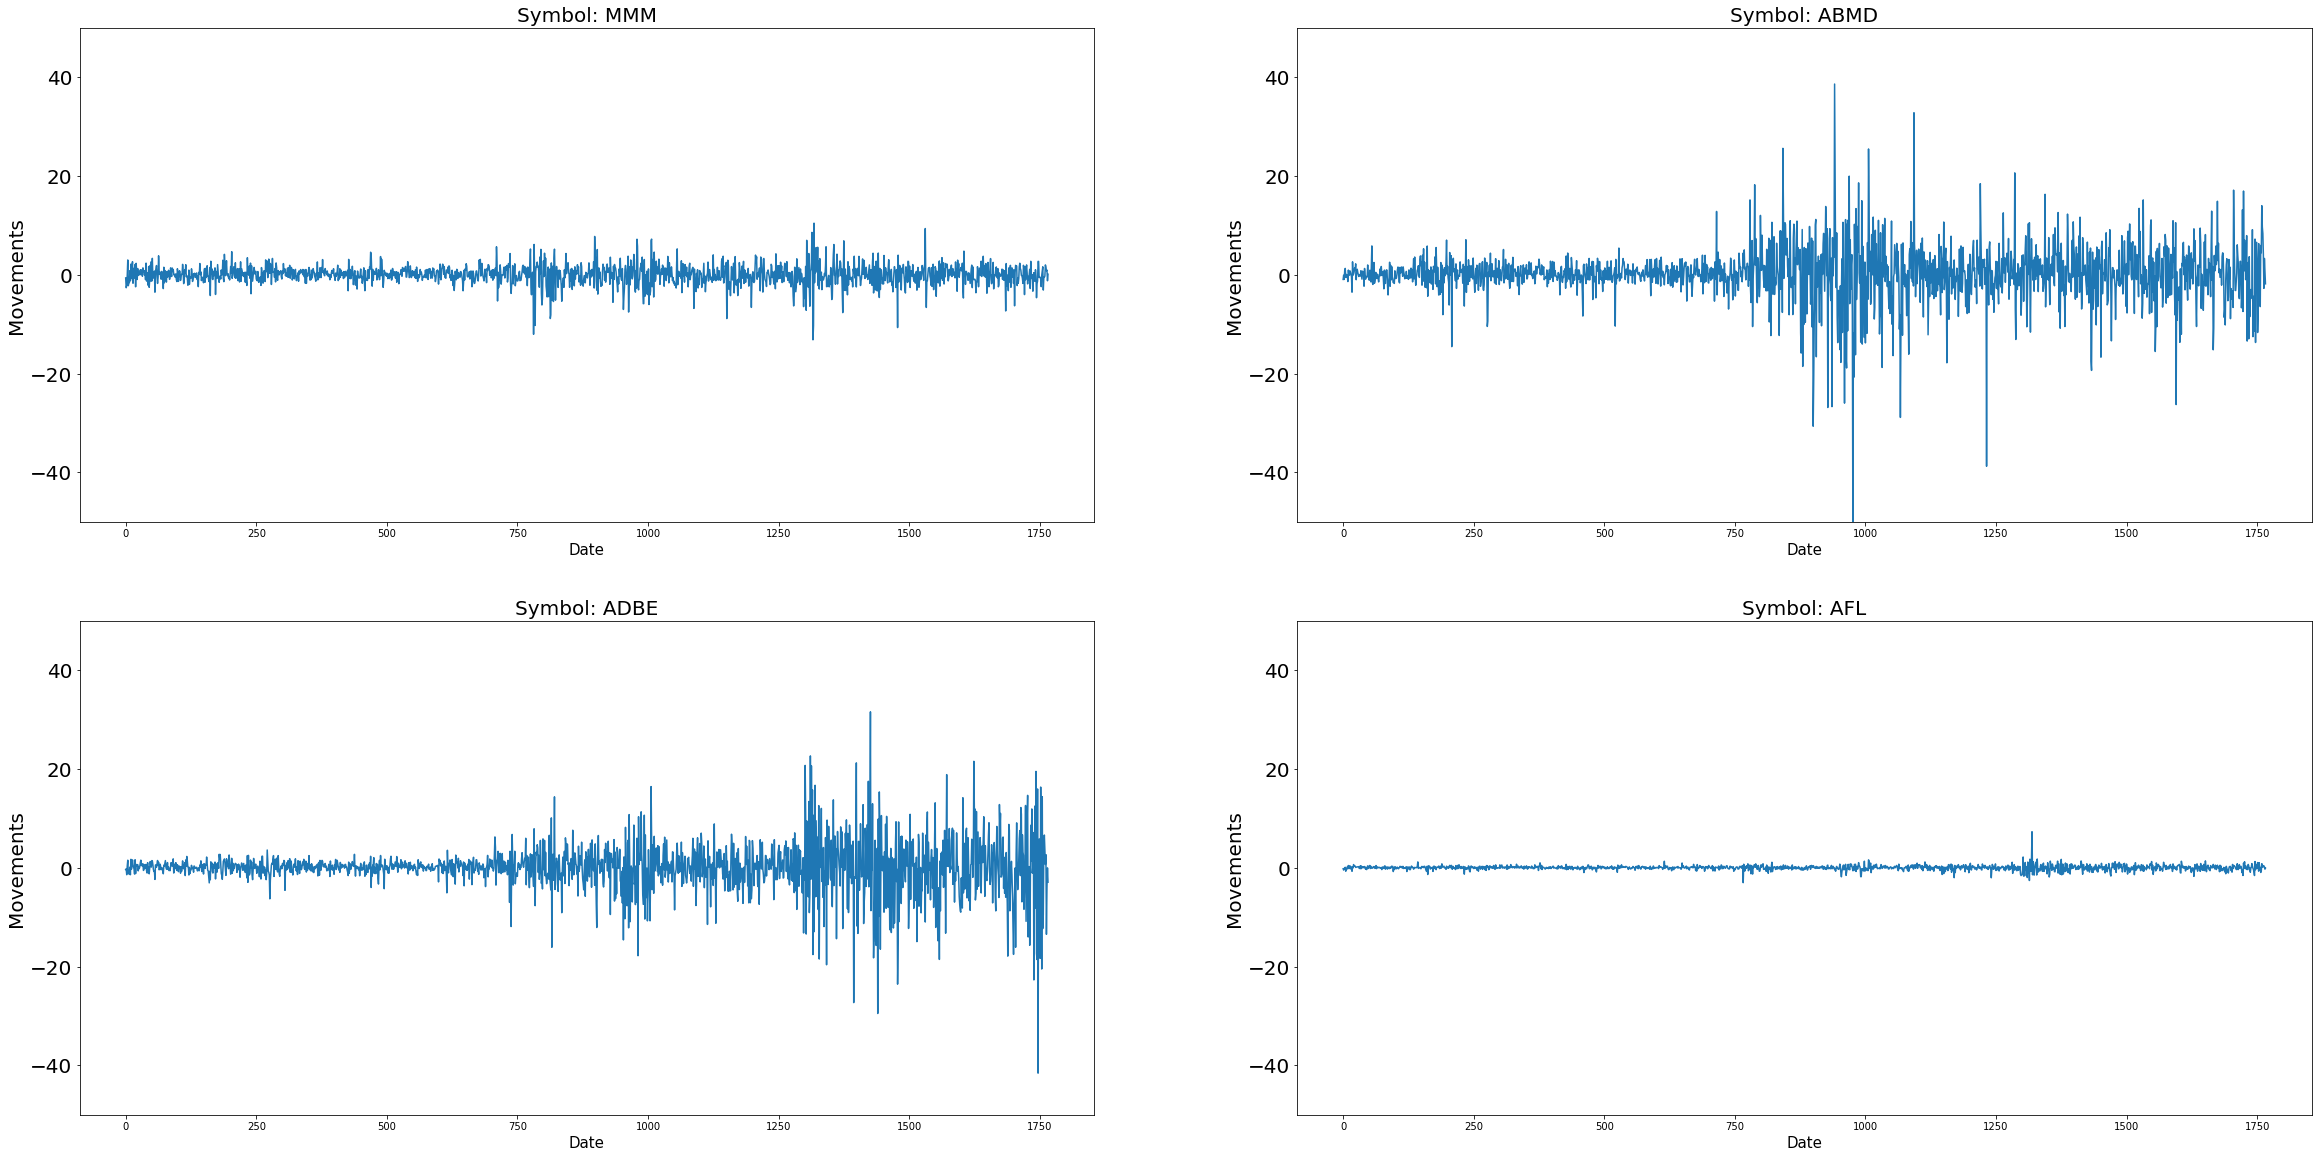

In [32]:
fig, ax = plt.subplots(figsize=(40, 20))
order = 1
MAX_NUM = 2
for idx in range(0, len(filtered_symbols), 4):
    plt.subplot(MAX_NUM, MAX_NUM, order)
    plt.title('Symbol: ' + filtered_symbols['Symbol'].iloc[idx], fontsize = 20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=20)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Movements', fontsize=20)
    plt.plot(movements[idx])
    plt.ylim([-50, 50])
    order = order + 1
    if (order > MAX_NUM**2):
        break

In [33]:
normalizer = Normalizer()
normalized_movements = normalizer.fit_transform(movements)
print("normalized_movements: ", normalized_movements)
print("normalized_movements_max: ", normalized_movements.max())
print("normalized_movements_min: ", normalized_movements.min())
print("normalized_movements_mean: ", normalized_movements.mean())

normalized_movements:  [[-0.00770612 -0.03129827 -0.02572639 ...  0.01102562 -0.0145821
   0.00118561]
 [-0.00985807 -0.00274736 -0.00872676 ...  0.02165535 -0.01971614
   0.02327153]
 [-0.00853849  0.00268355 -0.01439352 ...  0.01756499 -0.01000236
  -0.00634277]
 ...
 [-0.02268971  0.03893667 -0.01904817 ...  0.00210088 -0.00140055
  -0.01288552]
 [-0.0125505  -0.03302771 -0.03335799 ...  0.00561478 -0.01056886
   0.00957807]
 [-0.00256146 -0.00341535 -0.00887988 ...  0.05140072 -0.03227492
  -0.01929673]]
normalized_movements_max:  0.46302803130928055
normalized_movements_min:  -0.4854079835432753
normalized_movements_mean:  9.339612919774893e-05


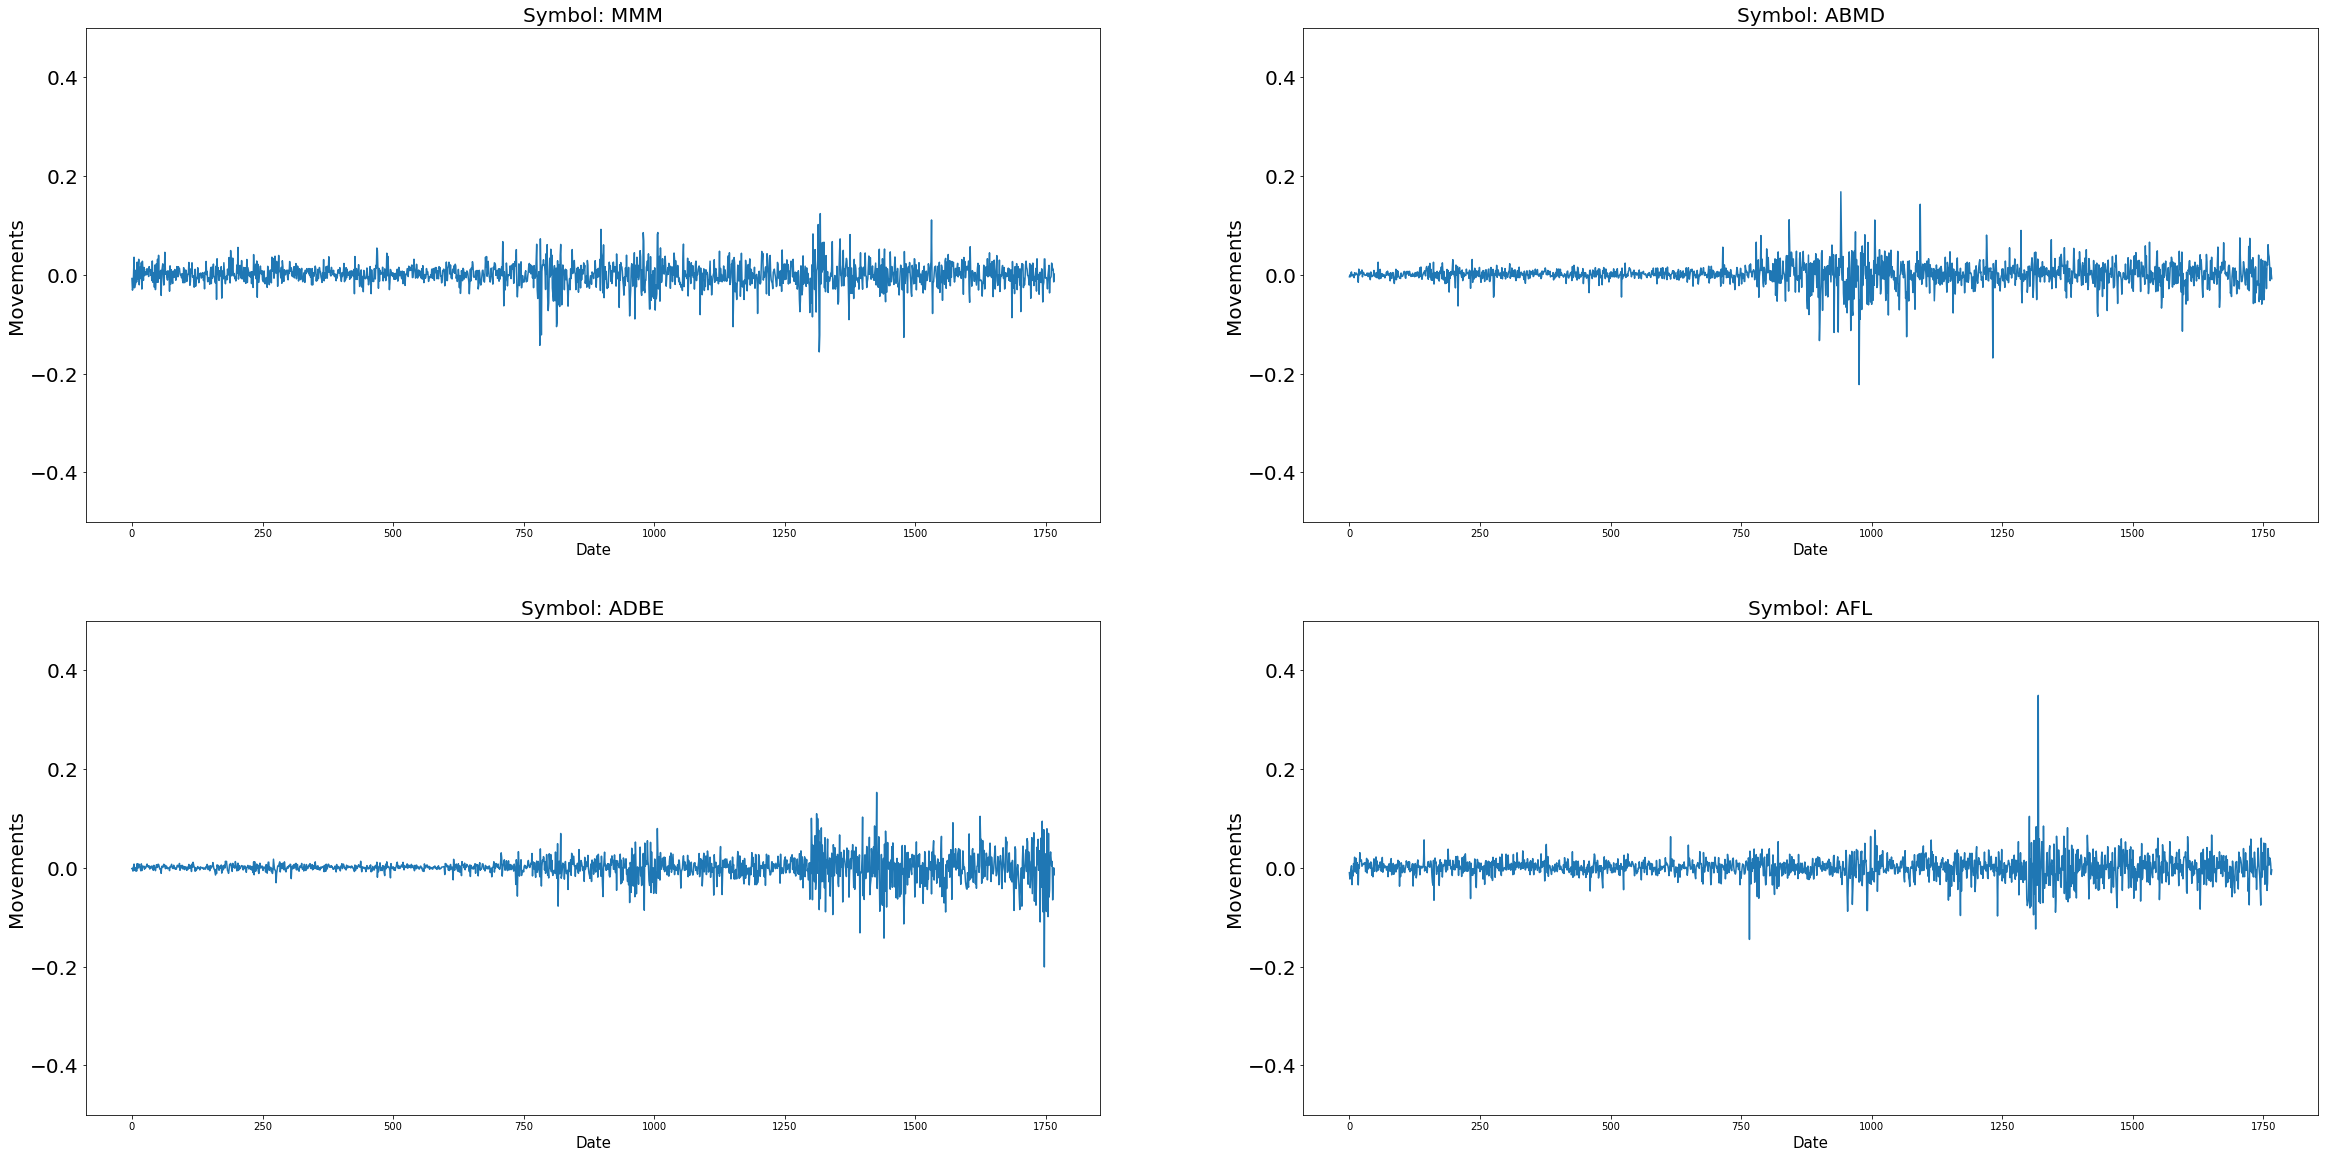

In [34]:
fig, ax = plt.subplots(figsize=(40, 20))
order = 1
MAX_NUM = 2
for idx in range(0, len(filtered_symbols), 4):
    plt.subplot(MAX_NUM, MAX_NUM, order)
    plt.title('Symbol: ' + filtered_symbols['Symbol'].iloc[idx], fontsize = 20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=20)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Movements', fontsize=20)
    plt.plot(normalized_movements[idx])
    plt.ylim([-0.5, 0.5])
    order = order + 1
    if (order > MAX_NUM**2):
        break

In [35]:
pca_data = PCA(n_components=2).fit_transform(normalized_movements)
print("pca_data shape = ", pca_data.shape)
print("pca_data = ",  pca_data)

pca_data shape =  (485, 2)
pca_data =  [[-6.82863523e-02 -1.52023008e-01]
 [-1.76059553e-01 -1.32716685e-02]
 [ 3.17982412e-01  1.65461755e-01]
 [ 4.81769363e-02  8.88176563e-03]
 [ 4.87834114e-02  3.50346618e-01]
 [ 1.25073904e-01  2.25832033e-01]
 [ 1.51370765e-01  3.20586828e-01]
 [-1.18490438e-01 -2.06740554e-01]
 [ 2.31330509e-01  5.81288141e-01]
 [ 1.79026929e-01  1.20749886e-02]
 [-5.07545032e-02 -7.74386126e-02]
 [-1.15870102e-02 -9.66758051e-02]
 [-1.92961206e-01 -2.73572828e-01]
 [ 1.27475238e-01  3.29387901e-01]
 [-3.32547209e-01 -2.30010869e-01]
 [ 1.01048969e-01 -2.89640977e-02]
 [ 1.59152487e-01  1.90282572e-01]
 [-2.63698604e-01 -8.42366970e-02]
 [-1.75886005e-01  1.81465928e-01]
 [ 3.83099329e-01 -1.58674161e-01]
 [-8.24434334e-03  3.65861234e-01]
 [ 6.80028790e-03 -9.36988362e-02]
 [ 5.85779235e-01 -4.12539176e-01]
 [-1.26758617e-02 -2.32581561e-01]
 [ 6.46703063e-02  4.01247261e-01]
 [ 6.22274788e-02  3.88992330e-01]
 [ 1.33163796e-01 -2.23166945e-01]
 [ 1.14486664e-0

56.54418869211761
43.70247677296468
28.065608475562236
20.43352675663016
14.257379501553064
12.489773156361302
12.418019571998668
10.760632432461072
9.318574851051377
7.868599557731149
7.25691939173072
5.262611942505289
13.686757957454786
5.508107970798908
4.976078957983858
5.1193270629889716
5.522659066295324
4.3551702382757576
3.859482005850602
3.729673277204597


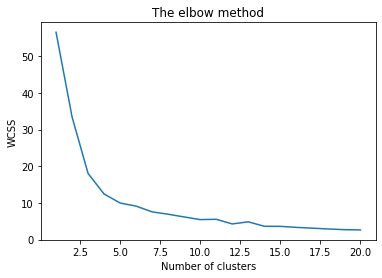

In [36]:
clusters = 20
wcss = []
for num in range(1, clusters + 1):
    k = KMeans(K=num, max_iters=150)
    y_predict = k.predict(pca_data)
    wcss.append(k.inertia_)
plt.plot(range(1, clusters + 1), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

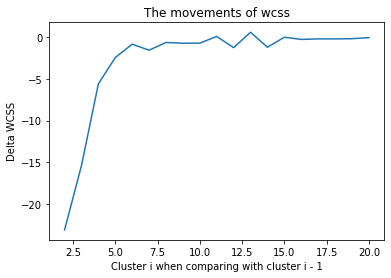

In [37]:
delta_wcss = []
for num in range(2,  clusters + 1):
    delta_wcss.append(wcss[num - 1] - wcss[num - 2])
    
plt.plot(range(2, clusters + 1) , delta_wcss)
plt.title('The movements of wcss')
plt.xlabel("Cluster i when comparing with cluster i - 1")
plt.ylabel('Delta WCSS')
plt.show()

10.852257093148335
Time:  0.23617994400001407


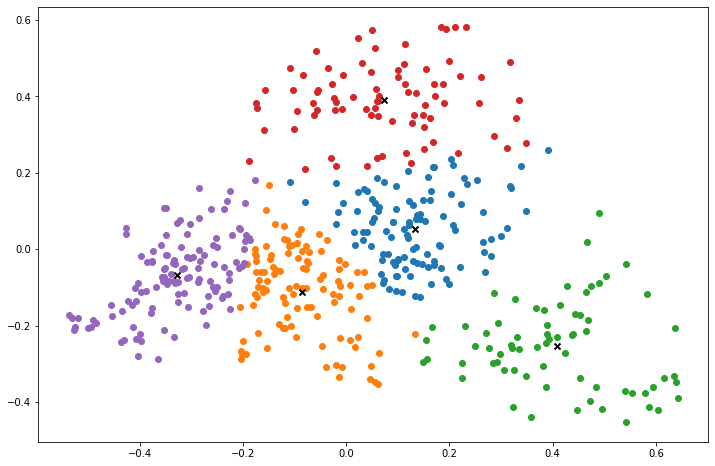

In [38]:
import timeit
start = timeit.default_timer()
k = KMeans(K=5, max_iters=150)
y_predict = k.predict(pca_data)
stop = timeit.default_timer()
print('Time: ', stop - start)
k.visualize()

In [39]:
tableLabelAndSymbol = [[] for i in range(5)]
for idxLabel in range(len(y_predict)):
    labelNumber = int(y_predict[idxLabel])
    symbol = filtered_symbols['Symbol'].iloc[idxLabel]
    tableLabelAndSymbol[labelNumber].append(symbol)        

for idxLabel in range(5):
    print("Label " + str(idxLabel) + " includes: ", tableLabelAndSymbol[idxLabel])
    print("-------------------------------------------------------------------")

Label 0 includes:  ['ABT', 'ABBV', 'ADP', 'APD', 'AKAM', 'ABC', 'AMGN', 'APH', 'ANTM', 'AON', 'AZO', 'BALL', 'BAX', 'BDX', 'BIIB', 'BSX', 'BMY', 'BR', 'BRO', 'CBOE', 'CDW', 'CNC', 'CERN', 'CHTR', 'CTAS', 'CSCO', 'CTXS', 'CME', 'CTSH', 'STZ', 'COO', 'COST', 'DHI', 'DG', 'DPZ', 'ECL', 'EW', 'EFX', 'EL', 'EXPD', 'FDS', 'FAST', 'FIS', 'FISV', 'AJG', 'GRMN', 'IT', 'GILD', 'GPN', 'HOLX', 'HD', 'HUM', 'INCY', 'ICE', 'JKHY', 'KR', 'LHX', 'LH', 'LDOS', 'LLY', 'LIN', 'LMT', 'LOW', 'MKTX', 'MMC', 'MAS', 'MCD', 'MDT', 'MRK', 'MOH', 'MNST', 'MCO', 'MSI', 'NDAQ', 'NEM', 'NKE', 'NDSN', 'NOC', 'NLOK', 'NRG', 'NVR', 'ORLY', 'ORCL', 'PAYX', 'PFE', 'PGR', 'DGX', 'REGN', 'RMD', 'ROL', 'ROP', 'SPGI', 'SHW', 'SBUX', 'STE', 'SYK', 'TMUS', 'TGT', 'TFX', 'TSCO', 'UNH', 'VRSK', 'VRTX', 'V', 'WMT', 'WAT', 'WTW', 'YUM']
-------------------------------------------------------------------
Label 1 includes:  ['MMM', 'AOS', 'ADM', 'AAP', 'AES', 'AFL', 'ALLE', 'ALL', 'MO', 'AMCR', 'AME', 'AIZ', 'T', 'AVY', 'WRB', 'BRK

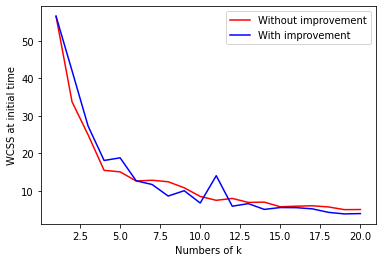

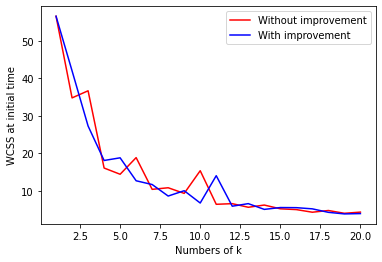

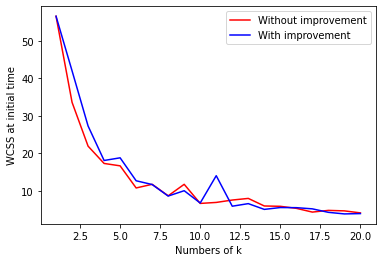

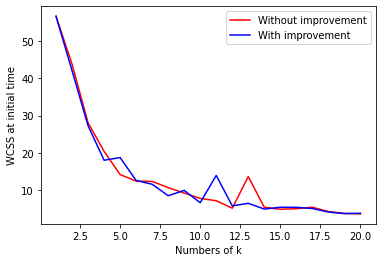

In [40]:
no_improve1 = [56.544188692111305, 33.71069834100648, 24.92767269399603,15.444271052916351,15.037363567068518,12.607272220433606,12.796277213217447,12.395022014171678,10.789746753698946,8.488691953017387,7.4457973155611725,7.954210613276635,6.885319915936751,6.960101868659061,5.731359037832648,5.881909276586891,5.991065317356624,5.682045512657648,4.9613332861432085,4.989401222384183]
no_improve2 = [56.544188692117075,
34.76864183040556,
36.66042854094316,
16.05703007074397,
14.39735224255952,
18.834289220695965,
10.37180298405982,
10.796150722382261,
9.295427480838214,
15.34049011767762,
6.385333886274065,
6.555272577416619,
5.591779966092206,
6.181819422564425,
5.180550643740095,
4.969556238459895,
4.270922660157177,
4.728683009003446,
3.985913793376152,
4.2977814674536665
]
no_improve3 = [56.54418869211098,
33.58231723053021,
21.892032200634585,
17.278399456277377,
16.64121664891509,
10.739991766960058,
11.716508765925367,
8.648365262797245,
11.715520548151002,
6.6175322261553475,
6.882561988249609,
7.519580103374844,
7.955034812531411,
5.9377108893572625,
5.846242911379335,
5.306624732100395,
4.305495748076909,
4.760318991225792,
4.62909679895261,
4.091263087892017]

no_improve4 = [56.54418869211761,
43.70247677296468,
28.065608475562236,
20.43352675663016,
14.257379501553064,
12.489773156361302,
12.418019571998668,
10.760632432461072,
9.318574851051377,
7.868599557731149,
7.25691939173072,
5.262611942505289,
13.686757957454786,
5.508107970798908,
4.976078957983858,
5.1193270629889716,
5.522659066295324,
4.3551702382757576,
3.859482005850602,
3.729673277204597]

improve = [56.54418869211733,
41.98382037770514,
27.268079846023408,
18.071087255989834,
18.78155560571676,
12.659871010092242,
11.657449857687123,
8.585071642823191,
10.007296853219536,
6.7262499197609795,
14.01361630915931,
5.874144975093637,
6.56138820345789,
5.026009960246889,
5.518424867673087,
5.485688870043671,
5.169643213837435,
4.24025041825656,
3.8184287432511184,
3.9068315863134773]


plt.plot(range(1, len(no_improve1)+1), no_improve1 , color='r', label="Without improvement")
plt.plot(range(1, len(improve) + 1),  improve , color='b', label="With improvement")
plt.xlabel("Numbers of k")
plt.ylabel("WCSS at initial time")
plt.legend()
plt.show()

plt.plot(range(1, len(no_improve2)+1), no_improve2 , color='r', label="Without improvement")
plt.plot(range(1, len(improve) + 1),  improve , color='b', label="With improvement")
plt.xlabel("Numbers of k")
plt.ylabel("WCSS at initial time")
plt.legend()
plt.show()

plt.plot(range(1, len(no_improve3)+1), no_improve3 , color='r', label="Without improvement")
plt.plot(range(1, len(improve) + 1),  improve , color='b', label="With improvement")
plt.xlabel("Numbers of k")
plt.ylabel("WCSS at initial time")
plt.legend()
plt.show()

plt.plot(range(1, len(no_improve4)+1), no_improve4 , color='r', label="Without improvement")
plt.plot(range(1, len(improve) + 1),  improve , color='b', label="With improvement")
plt.xlabel("Numbers of k")
plt.ylabel("WCSS at initial time")
plt.legend()
plt.show()

Time:  0.05633796299980531


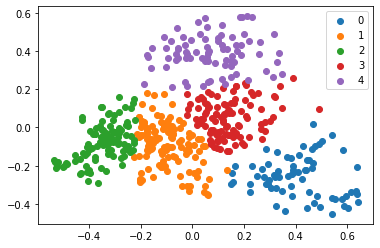

In [43]:
from sklearn.cluster import KMeans
import timeit

start = timeit.default_timer()
kmeans = KMeans(
    max_iter=150,
    n_clusters=5
)
label = kmeans.fit_predict(pca_data)
stop = timeit.default_timer()
print('Time: ', stop - start)
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(pca_data[label == i , 0] , pca_data[label == i , 1] , label = i)
plt.legend()
plt.show()


In [42]:
tableLabelAndSymbol = [[] for i in range(5)]
for idxLabel in range(len(y_label_sklearn)):
    labelNumber = int(y_label_sklearn[idxLabel])
    symbol = filtered_symbols['Symbol'].iloc[idxLabel]
    tableLabelAndSymbol[labelNumber].append(symbol)        

for idxLabel in range(5):
    print("Label " + str(idxLabel) + " includes: ", tableLabelAndSymbol[idxLabel])
    print("-------------------------------------------------------------------")

Label 0 includes:  ['ABMD', 'ACN', 'ATVI', 'ADBE', 'A', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'BIO', 'TECH', 'AVGO', 'CDNS', 'CTLT', 'CRL', 'CMG', 'CPRT', 'DHR', 'DXCM', 'EBAY', 'EA', 'ENPH', 'EPAM', 'ETSY', 'FFIV', 'FTNT', 'GNRC', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'IPGP', 'IQV', 'KEYS', 'KLAC', 'LRCX', 'MA', 'MTCH', 'FB', 'MTD', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSCI', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'PAYC', 'PENN', 'PKI', 'POOL', 'PTC', 'QRVO', 'QCOM', 'CRM', 'NOW', 'SWKS', 'SEDG', 'SNPS', 'TTWO', 'TER', 'TSLA', 'TXN', 'TMO', 'TRMB', 'TWTR', 'TYL', 'VRSN', 'WST', 'ZBRA', 'ZTS']
-------------------------------------------------------------------
Label 1 includes:  ['ABT', 'ABBV', 'ADP', 'APD', 'AKAM', 'ABC', 'AMGN', 'ANTM', 'AON', 'AZO', 'BALL', 'BAX', 'BDX', 'BIIB', 'BSX', 'BMY', 'BR', 'BRO', 'CBOE', 'CDW', 'CNC', 'CERN', 'CHTR', 'CTAS', 'CSCO', 'CTXS', 'CME', 'CTSH', 'STZ', 'COO', 'COST', 'DHI', 'DG', 'DPZ', 'ECL', 'EW', 'EFX', 'EQ